# GIS with ![Python](https://www.python.org/static/community_logos/python-logo-inkscape.svg) and ![IPython](https://ipython.org/_static/IPy_header.png) 

# Getting some data

There are many sources of GIS data. Here are some useful links:

* [WorldMap](http://worldmap.harvard.edu/)
* [FAO's GeoNetwork](http://www.fao.org/geonetwork)
* [IPUMS USA Boundary files for Censuses](https://usa.ipums.org/usa/volii/boundaries.shtml)
* [IPUMS International Boundary files for Censuses](https://international.ipums.org/international/gis.shtml)
* [GADM database of Global Administrative Areas](http://www.gadm.org/)
* [Global Administrative Unit Layers](http://www.fao.org/geonetwork/srv/en/metadata.show?id=12691)
* [Natural Earth](http://www.naturalearthdata.com/): Various vector and raster files with all kinds of geographical, cultural and socioeconomic variables
* [Global Map](http://www.iscgm.org/cgi-bin/fswiki/wiki.cgi?page=Summary)
* [Digital Chart of the World](http://worldmap.harvard.edu/data/geonode:Digital_Chart_of_the_World)
* [Sage](http://www.sage.wisc.edu/mapsdatamodels.html) and [Sage Atlas](http://www.sage.wisc.edu/atlas/maps.php)
* [Ramankutti's Datasets on land use, crops, etc.](http://www.geog.mcgill.ca/~nramankutty/Datasets/Datasets.html)
* [SEDAC at Columbia Univesrity](http://sedac.ciesin.columbia.edu/data/sets/browse): Gridded Population, Hazzards, etc.
* [World Port Index](http://msi.nga.mil/NGAPortal/MSI.portal?_nfpb=true&_pageLabel=msi_portal_page_62&pubCode=0015)
* [USGS elevation maps](http://eros.usgs.gov/elevation-products)
* [NOOA's Global Land One-km Base Elevation Project (GLOBE)](http://www.ngdc.noaa.gov/mgg/topo/globe.html)
* [NOOA Nightlight data](http://ngdc.noaa.gov/eog/download.html): This is the data used by Henderson, Storeygard, and Weil AER 2012 paper.
* [Other NOOA Data](http://www.ngdc.noaa.gov/ngdcinfo/onlineaccess.html)
* [GEcon](http://gecon.yale.edu/)
* [OpenStreetMap](http://openstreetmap.org)
* [U.S. Census TIGER](http://www.census.gov/geo/maps-data/data/tiger.html)
* [Geo-referencing of Ethnic Groups](http://www.icr.ethz.ch/data/other/greg)

See also [Wikipedia links](http://en.wikipedia.org/wiki/List_of_GIS_data_sources)

# Set-up

Let's import the packages we will use and set th epaths for outputs.

In [36]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np
import os, sys

# GIS packages
import geopandas as gpd
from geopandas.tools import overlay
from shapely.geometry import Polygon, Point
import georasters as gr
# Alias for Geopandas
gp = gpd

# Plotting
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Initial Example -- Natural Earth Country Shapefile

Let's download a shapefile with all the polygons for countries so we can visualize and analyze some of the data we have downloaded in other notebooks. [Natural Earth](https://www.naturalearthdata.com/downloads/) provides lots of free data so let's use that one. 

For shapefiles and other polygon type data ``geopandas`` is the most useful package. Next we will use it to download the shapefile (which is contained in a zip archive). ``geopandas`` extends ``pandas`` for use with GIS data. We can  use many functions and properties of the ``GeoDataFrame`` to analyze our data. 

In [37]:
countries = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip')

Let's look inside this ``GeoDataFrame``

In [38]:
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((117.7036079039552 4.163414542001791...
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,(POLYGON ((117.7036079039552 4.163414542001791...
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,(POLYGON ((-69.51008875199994 -17.506588197999...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,...,마카오,Macau,Makau,Macau,Макао,Macao,Makao,Ma Cao,澳門,(POLYGON ((113.5586043630001 22.16303131700005...
251,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,애시모어 카르티에 제도,Ashmore- en Cartiereilanden,Wyspy Ashmore i Cartiera,Ilhas Ashmore e Cartier,Острова Ашмор и Картье,Ashmore- och Cartieröarna,Ashmore ve Cartier Adaları,Quần đảo Ashmore và Cartier,阿什莫尔和卡捷岛,POLYGON ((123.5970158210001 -12.42831796699988...
252,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,바호 누에보 뱅크,Bajo Nuevo,Bajo Nuevo,Ilha Baixo Novo,Бахо-Нуэво,Bajo Nuevo,Bajo Nuevo Bank,Bajo Nuevo Bank,巴霍努埃沃礁,"POLYGON ((-79.9892878899999 15.79494863500008,..."
253,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,세라냐 뱅크,Serranilla,Isla Serranilla,Ilha Serranilla,Серранилья-Банк,Serranilla Bank,Serranilla Bank,Serranilla Bank,塞拉纳浅滩,POLYGON ((-78.63707434799994 15.86208730700008...


Each row contains the information for one country. Each column is one property or variable. Unlike ``pandas`` ``DataFrame``s, ``geopandas`` always must have a ``geometry`` column. Let's plot this data

Text(0.5, 1, 'WGS84 (lat/lon)')

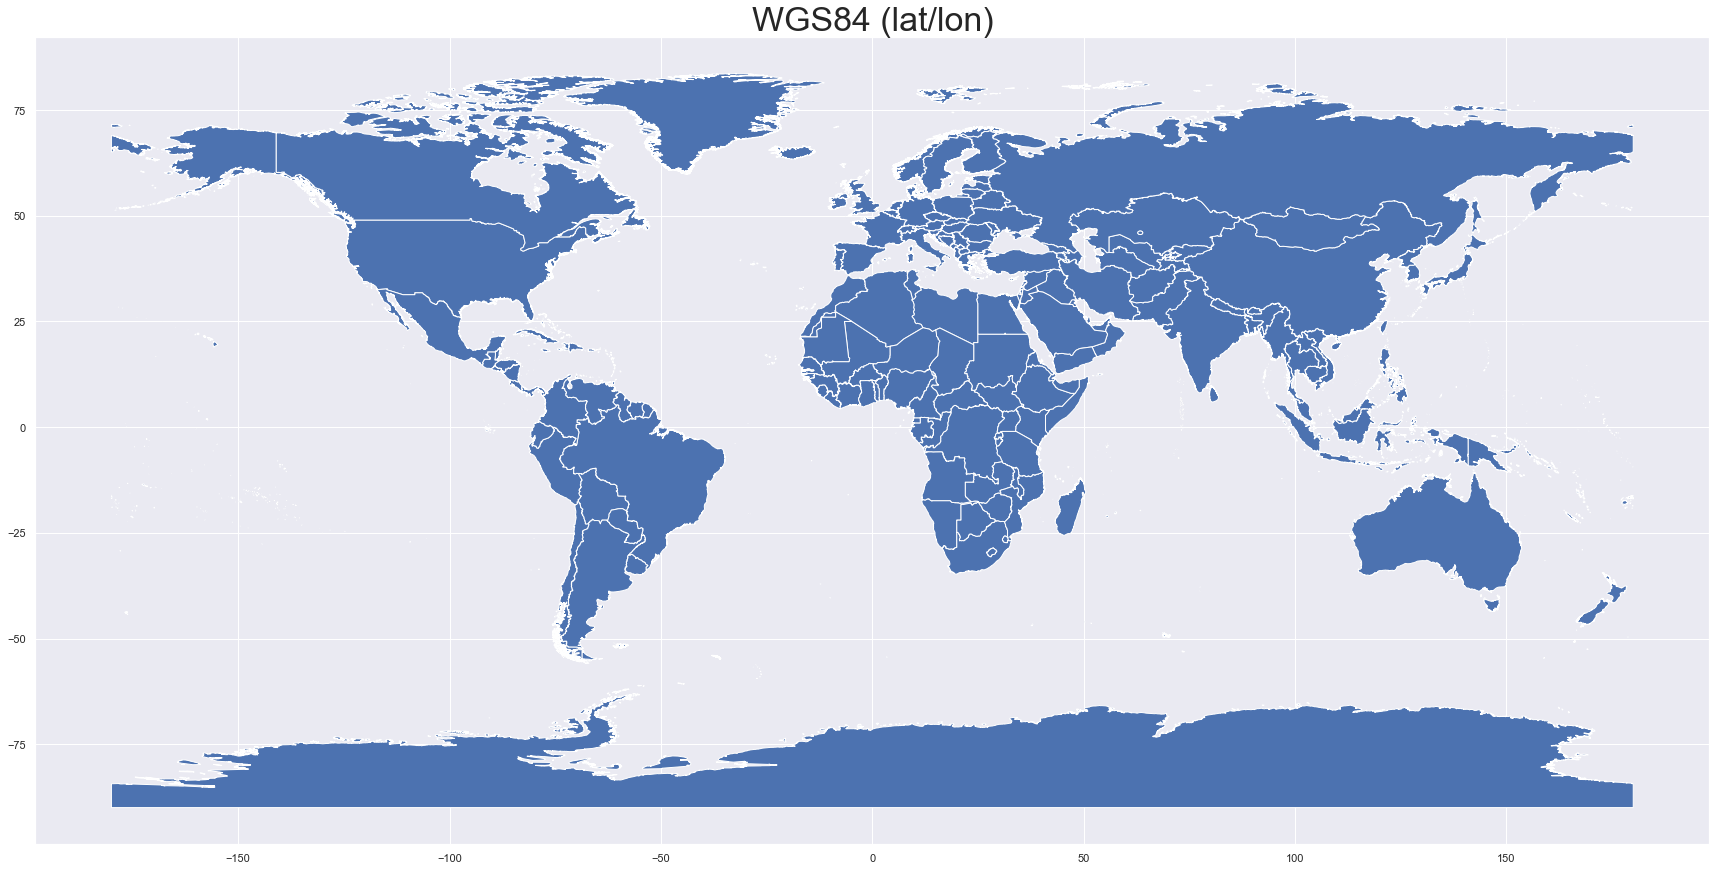

In [39]:
fig, ax = plt.subplots(figsize=(30,20))
countries.plot(ax=ax)
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

We can also get some additional information on this data. For example its projection

In [40]:
countries.crs

{'init': 'epsg:4326'}

We can reproject the data from its current WGS84 projection to other ones. Let's do this and plot the results so we can see how different projections distort results.

Text(0.5, 1, 'Mercator')

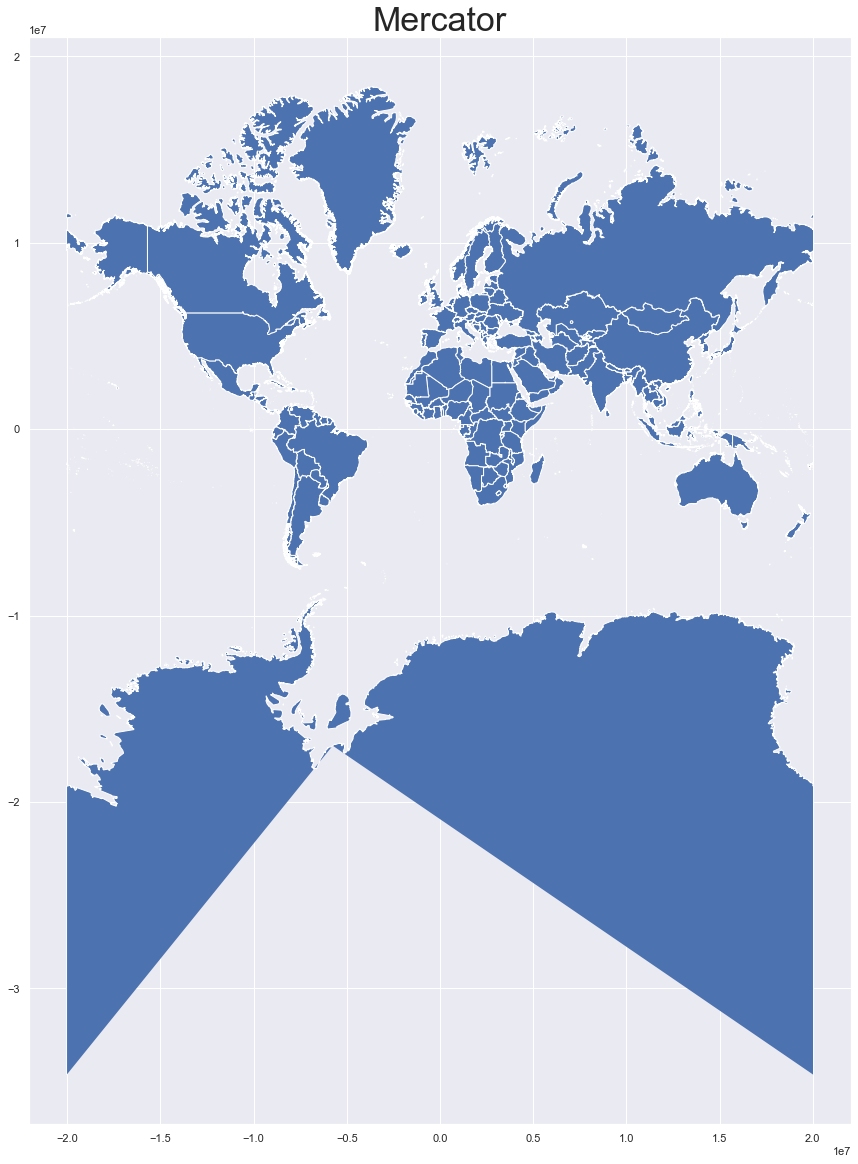

In [41]:
fig, ax = plt.subplots(figsize=(30,20))
countries_merc = countries.to_crs(epsg=3395)
countries_merc.plot(ax=ax)
ax.set_title("Mercator", fontdict={'fontsize':34})

Text(0.5, 1, 'Cylindrical Equal Area')

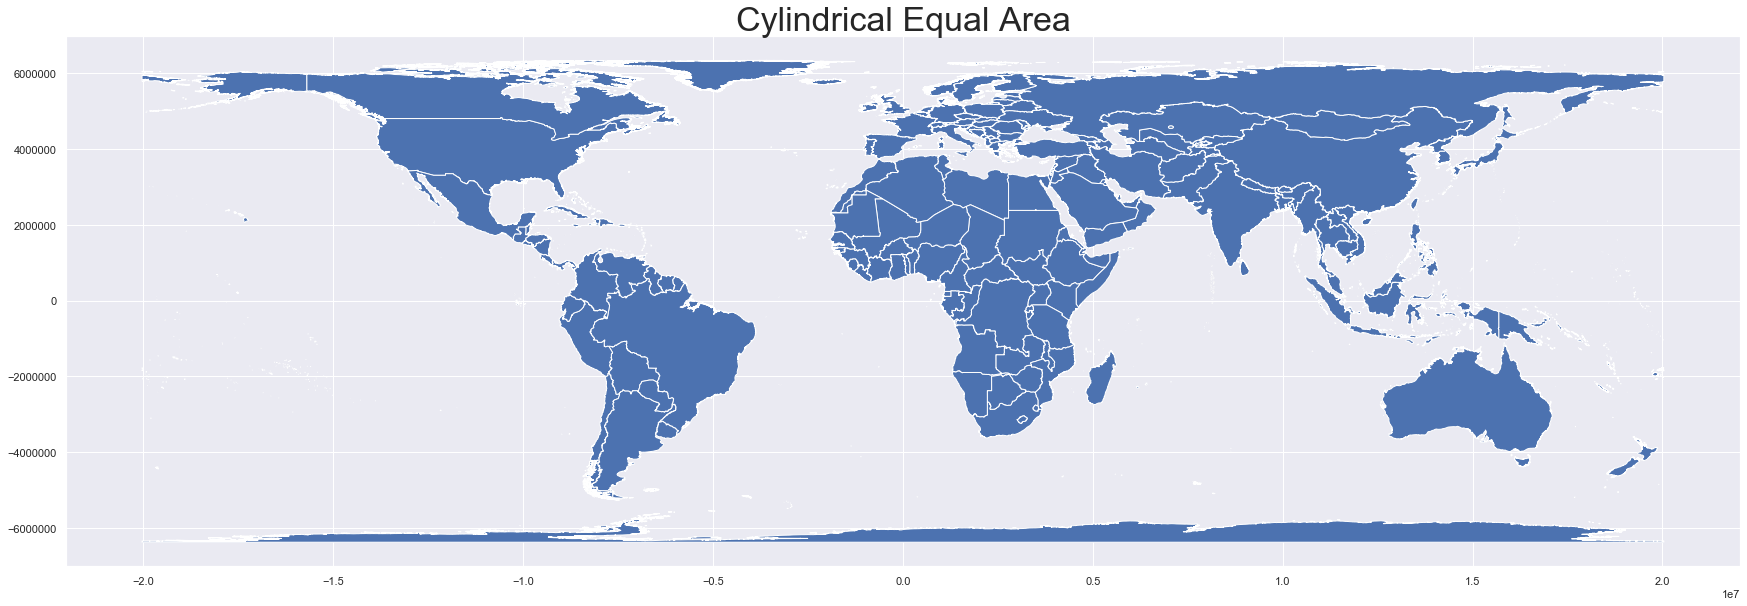

In [42]:
cea = {'datum': 'WGS84',
 'lat_ts': 0,
 'lon_0': 0,
 'no_defs': True,
 'over': True,
 'proj': 'cea',
 'units': 'm',
 'x_0': 0,
 'y_0': 0}

fig, ax = plt.subplots(figsize=(30,20))
countries_cea = countries.to_crs(crs=cea)
countries_cea.plot(ax=ax)
ax.set_title("Cylindrical Equal Area", fontdict={'fontsize':34})

Notice that each projection shows the world in a very different manner, distoring areas, distances etc. So you need to take care when doing computations to use the correct projection. An important issue to remember is that you need a projected (not geographical) projection to compute areas and distances. Let's compare these three a bit. Start with the boundaries of each.

In [43]:
print('[xmin, ymin, xmax, ymax] in three projections')
print(countries.total_bounds)
print(countries_merc.total_bounds)
print(countries_cea.total_bounds)

[xmin, ymin, xmax, ymax] in three projections
[-180.          -90.          180.           83.63410065]
[-20037508.34278923 -34636982.07825699                inf
                inf]
[-20037508.34278923  -6363885.33192604  20037508.34278924
   6324296.52646162]


Let's describe the areas of these countries in the three projections

In [44]:
print('Area distribution in WGS84')
print(countries.area.describe(), '\n')
print('Area distribution in Mercator')
print(countries_merc.area.describe(), '\n')
print('Area distribution in CEA')
print(countries_cea.area.describe(), '\n')

Area distribution in WGS84
count     255.000000
mean       84.030717
std       446.307748
min         0.000001
25%         0.069381
50%         5.920517
75%        37.990619
max      6049.574693
dtype: float64 

Area distribution in Mercator
count    2.540000e+02
mean     1.274530e+12
std      6.697560e+12
min      2.196509e+04
25%      9.736132e+08
50%      9.232570e+10
75%      5.377488e+11
max      8.288355e+13
dtype: float64 

Area distribution in CEA
count    2.550000e+02
mean     5.757889e+11
std      1.836629e+12
min      1.220383e+04
25%      6.820803e+08
50%      5.507806e+10
75%      3.655901e+11
max      1.698019e+13
dtype: float64 



Let's compare the area of each country in the two projected projections

In [45]:
countries_merc = countries_merc.set_index('ADM0_A3')
countries_cea = countries_cea.set_index('ADM0_A3')
countries_merc['ratio_area'] = countries_merc.area / countries_cea.area
countries_cea['ratio_area'] = countries_merc.area / countries_cea.area

Now, how do we know what is correct? Let's get some data from the CIA Factbook to compare the areas of countries in these projections to what the cotrrect area should be (notice that each country usually will use a local projection that ensures areas are correctly computed, so their data shoudl be closer to the truth than any of our global ones).

In [91]:
cia_area = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2147.txt', sep='\t', header=None)

In [92]:
cia_area = pd.DataFrame(cia_area[0].str.strip().str.split('\s\s+').tolist(), columns=['id', 'Name', 'area'])
cia_area.area = cia_area.area.str.replace(',', '').astype(int)

In [93]:
cia_area

,id,Name,area
0,1,Russia,17098242
1,2,Antarctica,14000000
2,3,Canada,9984670
3,4,United States,9833517
4,5,China,9596960
...,...,...,...
249,250,Spratly Islands,5
250,251,Ashmore and Cartier Islands,5
251,252,Coral Sea Islands,3
252,253,Monaco,2


In [94]:
countries_cea.area.loc['RUS'] / 1e6

16980189.48668187

In [9]:
#!/usr/bin/env python
''' 
This program uses python to import our data on crops and hofstede etc to map it and export certain parts of it
author Omer Ozak ozak@smu.edu
'''
from __future__ import division
import numpy as np
import csv, os ,sys
import pandas as pd
from osgeo import gdal, gdalnumeric, ogr, osr
from gdalconst import *
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.path import Path
from matplotlib.collections import PolyCollection
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

# Determine drive
drv="/Users/bizcocho/Desktop"

# Our data
dir=os.getenv("HOME")+'/Dropbox/LatexMe/Isolation/'
'''
datafile=dir+'data/data.dta'
data=pd.read_stata(datafile)
'''
datafile=dir+'data/data.csv'
data=pd.read_csv(datafile,low_memory=False)
data['riv']=data.riv+100

# Country shape file
cntryshp=drv+'/Geographical_Index/GIS/cntry00/cntry00.shp'
cntry=ogr.Open(cntryshp)
cntrylyr=cntry.GetLayer()
xmin,xmax,ymin,ymax=cntrylyr.GetExtent()
cylproj=cntrylyr.GetSpatialRef()
cylstr=cylproj.ExportToProj4() # '+proj=cea +lon_0=0 +lat_ts=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs '

### PARAMETERS FOR MATPLOTLIB :
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 4.
mpl.rcParams['xtick.labelsize'] = 4.
mpl.rcParams['ytick.labelsize'] = 4.


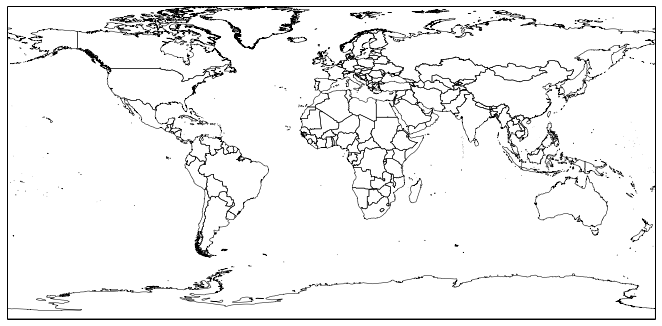

In [12]:
mydata='riv'
myfig='riv'
myproj='cyl'
mylabel='Indulgence                  vs                    Restraint'
size=(10,8)
cmap='Reds'
fig = plt.figure(figsize=size)#(11.7,8.3))
plt.subplots_adjust(left=0.01, right=0.91, top=0.99, bottom=0.01)
m = Basemap(projection=myproj,lon_0=0,llcrnrlat=ymin,urcrnrlat=ymax,llcrnrlon=xmin,urcrnrlon=xmax,lat_ts=20,resolution='c')
m.readshapefile(cntryshp[:-4],'myshape')
df=eval("data[['code','"+str(mydata)+"']]")
df=df.dropna()

In [13]:
def mymap(mydata,outfig,myproj='cyl',mylabel='',size=(5.85,4.15),labelpad=-30,cmap='YlOrBr'):
    # Import shape file with info
    fig = plt.figure(figsize=size)#(11.7,8.3))
    plt.subplots_adjust(left=0.01, right=0.91, top=0.99, bottom=0.01)
    m = Basemap(projection=myproj,lon_0=0,llcrnrlat=ymin,urcrnrlat=ymax,llcrnrlon=xmin,urcrnrlon=xmax,lat_ts=20,resolution='c')
    m.readshapefile(cntryshp[:-4],'myshape')
    df=eval("data[['code','"+str(mydata)+"']]")
    df=df.dropna()
    # Create CMP
    vmin=eval("df['"+str(mydata)+"'].min()")
    vmax=eval("df['"+str(mydata)+"'].max()")
    odedcmp = cm = plt.get_cmap(cmap) 
    cNorm  = colors.Normalize(vmin=vmin, vmax=vmax)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=odedcmp)
    myvar=[]
    patches=[]
    verts=[]
    for xy, info in zip(m.myshape, m.myshape_info):
        if info['ISO_3DIGIT']=='COD':
            info['ISO_3DIGIT']='ZAR'
        if info['ISO_3DIGIT']!='ATA':
            face=eval("df['"+str(mydata)+"'].ix[df.code==info['ISO_3DIGIT']].values")
            if face.shape[0]>0:
                myvar.append(face[0])
                verts.append(xy)
                # Choose a variable to color
                if face[0]!=np.nan:
                    poly = Polygon(xy, facecolor=scalarMap.to_rgba(face[0]),label=info['ISO_3DIGIT'], alpha=0.4)
                    #plt.gca().add_patch(poly)
                    patches.append(poly)
    mypolys=PatchCollection(patches, array=np.array(myvar), cmap=odedcmp, edgecolors='none')
    ax = plt.gca()
    ax.add_collection(mypolys)
    
    # create axes instance for colorbar on bottom. 
    pos = ax.get_position() 
    l, b, w, h = pos.bounds 
    cax = plt.axes([l+.4, b+0.32, .3, 0.01]) 
    # draw colorbar on bottom. 
    cbar=plt.colorbar(mypolys,cax=cax,orientation='horizontal',label=mylabel)
    cax.set_xlabel(mylabel,labelpad=labelpad,fontsize=10)
    plt.savefig(dir+'/maps/'+outfig+'.eps',dpi=150,bbox_inches='tight')
    plt.savefig(dir+'/maps/'+outfig+'.png',dpi=150,bbox_inches='tight')
    plt.show() 


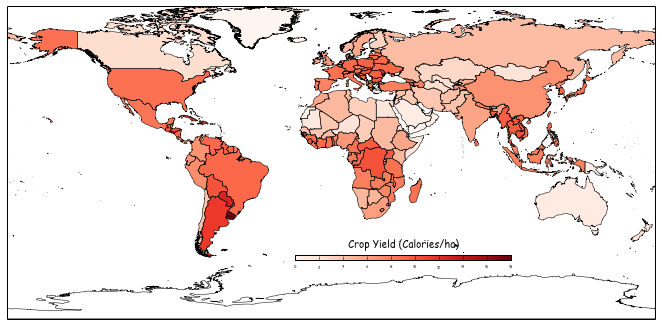

In [14]:
mymap('opten0lomean1500','opten0lomean1500',myproj='cyl',mylabel='Crop Yield (Calories/ha)',size=(10,8),cmap='Reds')